In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.linear_model import LinearRegression


In [21]:
car_df=pd.read_csv("vehicle.csv")
car_df.shape

(846, 19)

In [22]:
car_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [23]:

car_df.describe().transpose()
#looking at the below data we can see that the number of count is not equal is each attribute. So we need to identify such
# blank entries the fill it with eithwr mean or median.
# scaled_variance.1is highly skewed.

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [24]:
car_df.nunique()

compactness                     44
circularity                     27
distance_circularity            63
radius_ratio                   134
pr.axis_aspect_ratio            37
max.length_aspect_ratio         21
scatter_ratio                  131
elongatedness                   35
pr.axis_rectangularity          13
max.length_rectangularity       66
scaled_variance                128
scaled_variance.1              422
scaled_radius_of_gyration      143
scaled_radius_of_gyration.1     39
skewness_about                  23
skewness_about.1                41
skewness_about.2                30
hollows_ratio                   31
class                            3
dtype: int64

In [25]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [26]:
car_df = car_df.replace('', np.nan)

In [27]:
np.where(pd.isnull(car_df))

(array([  5,   9,  19,  35,  66,  66,  70,  77,  78, 105, 105, 105, 118,
        118, 141, 159, 177, 192, 207, 207, 215, 222, 222, 237, 249, 249,
        266, 266, 273, 285, 287, 308, 319, 329, 345, 372, 396, 419, 467,
        496, 522], dtype=int64),
 array([ 1,  3,  4,  2, 13, 14,  8, 13,  3,  1, 10, 15,  1,  2, 14,  3, 14,
        13,  2, 12,  7,  4, 14,  8,  6, 14,  1, 12,  8, 14,  3, 11,  2, 13,
         3, 10,  1, 16,  3, 11, 10], dtype=int64))

In [28]:
pd.isnull(car_df).sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [29]:
#Replacing NaN by median.
car_df.fillna(car_df.median(), inplace=True)
#By imputing the missing values with median we are changing the shape of distribution and introducing bias.
#but it's might be better than drpping missing values.

In [30]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

In [31]:
pd.isnull(car_df).sum()
#This output shows that all NaN values are replaced with respective column median values.

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

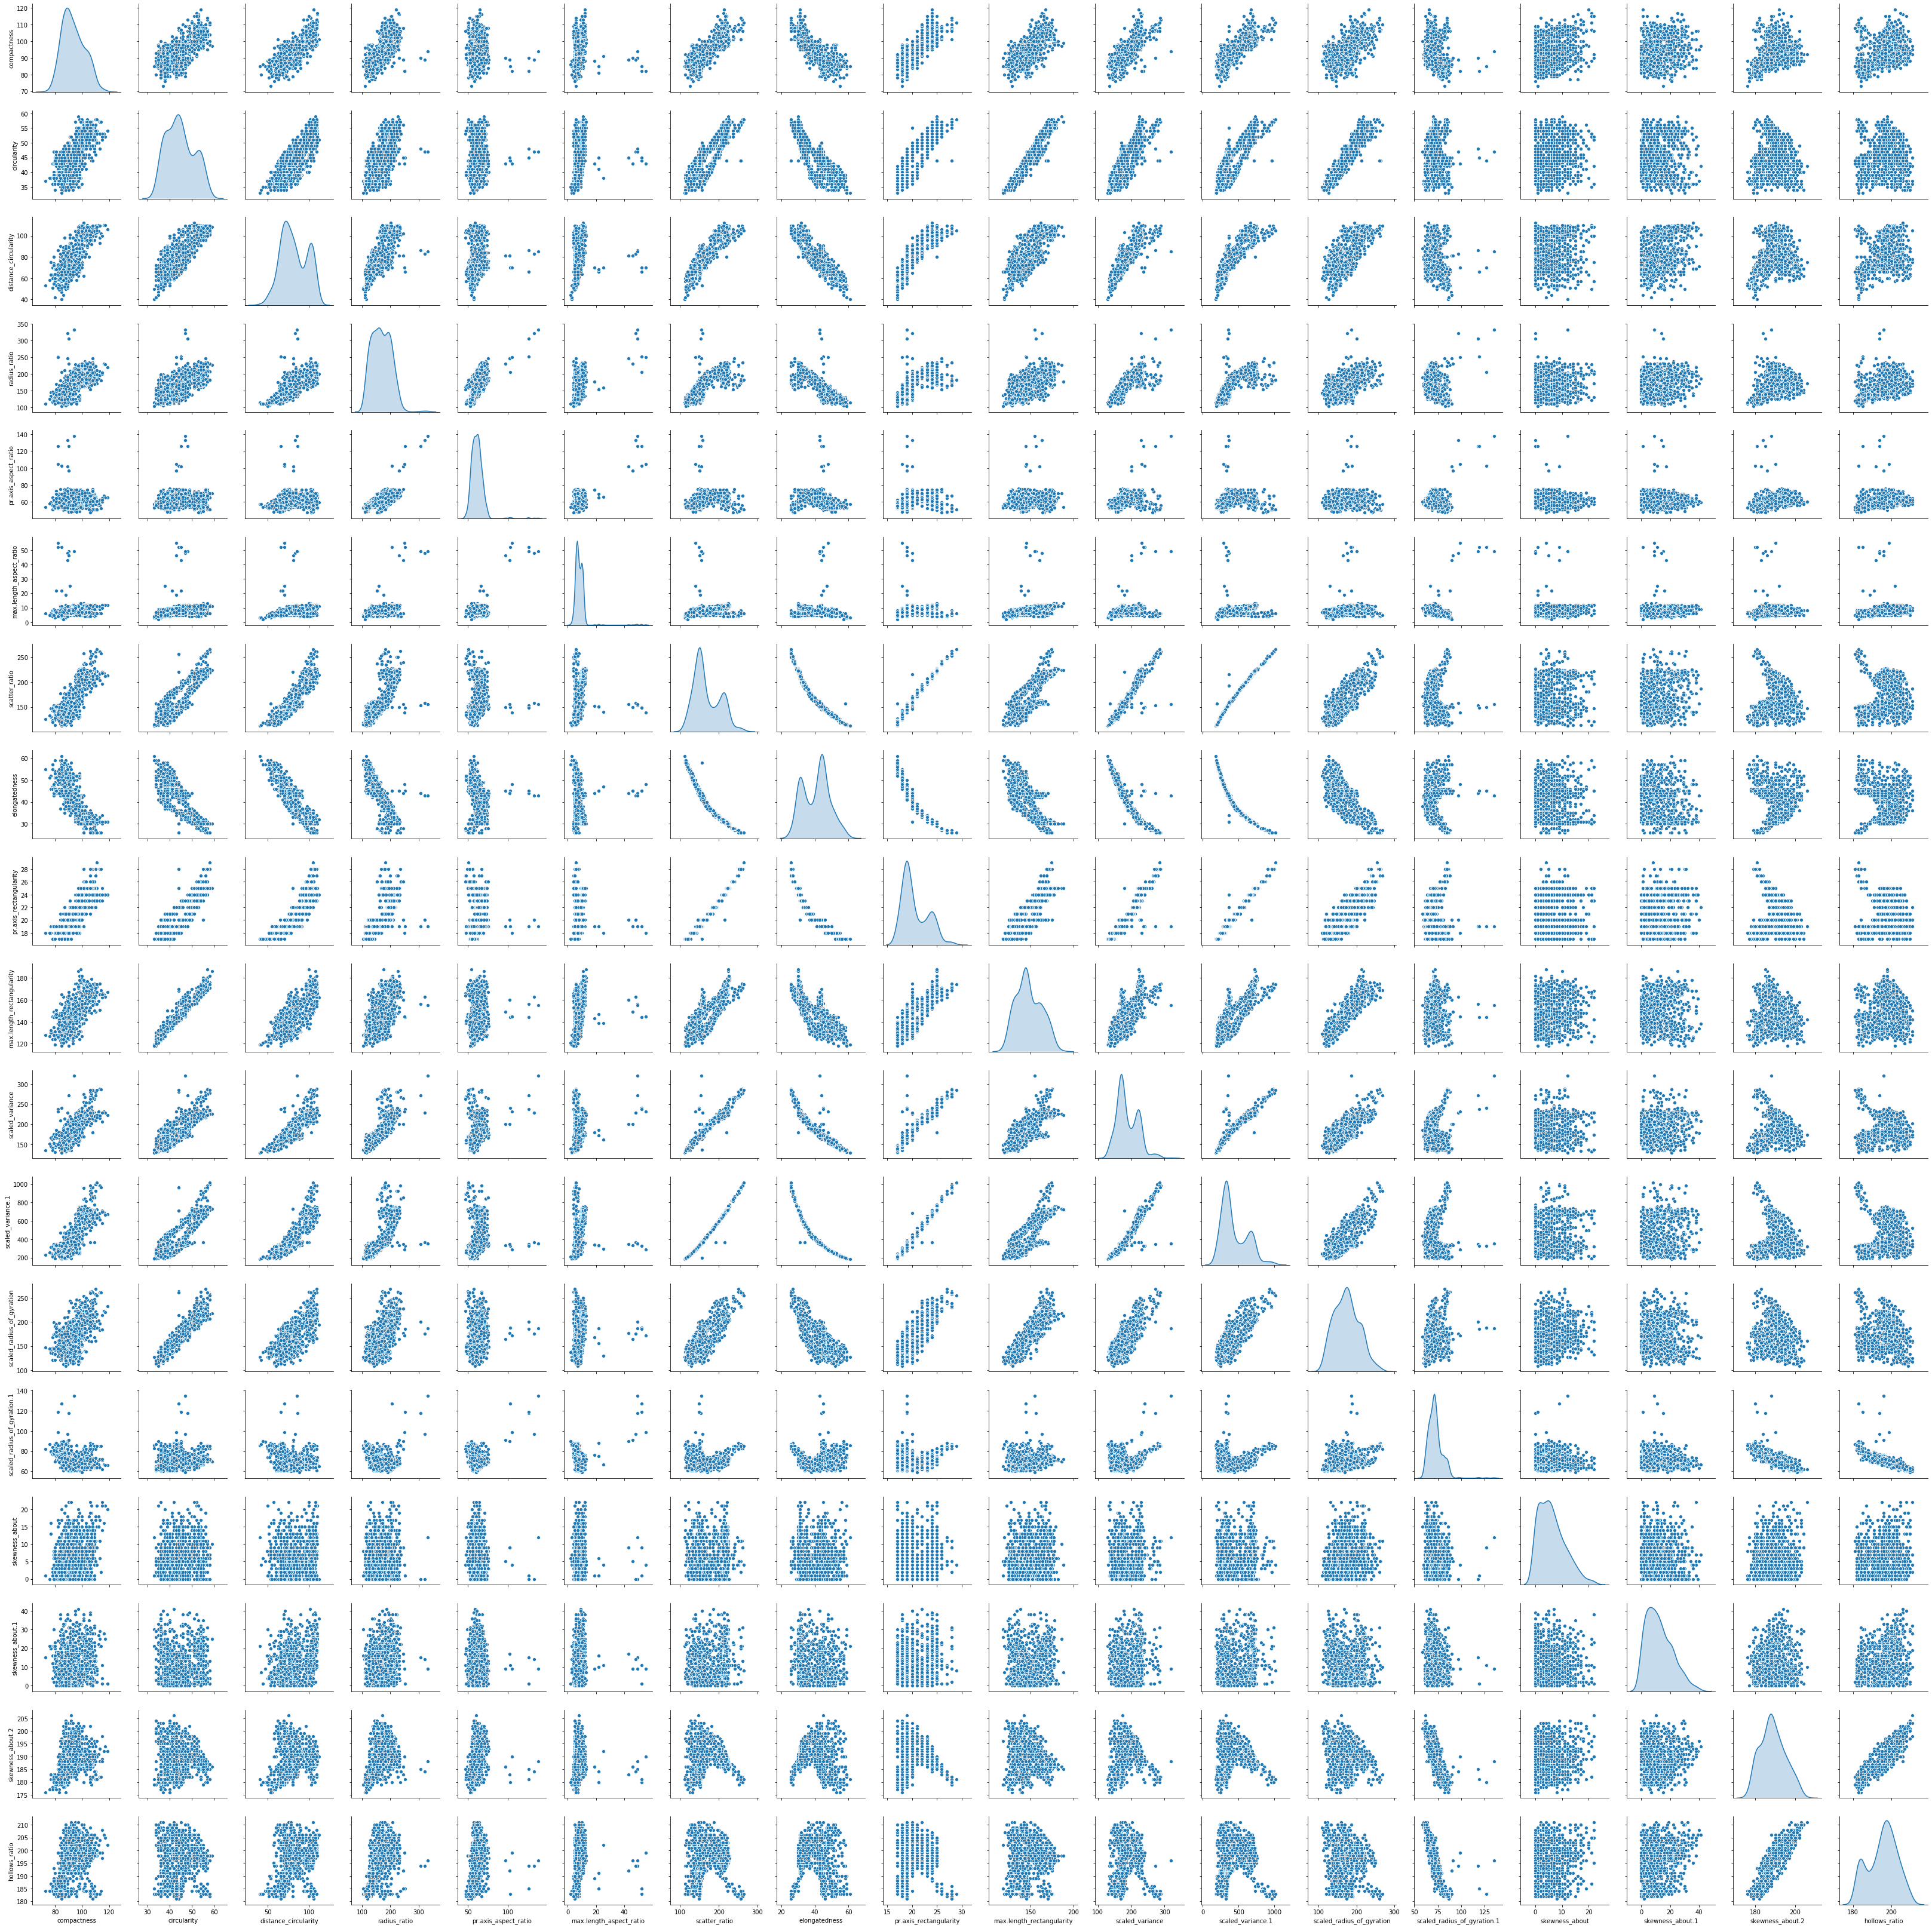

In [136]:
sns.pairplot(car_df,diag_kind='kde')

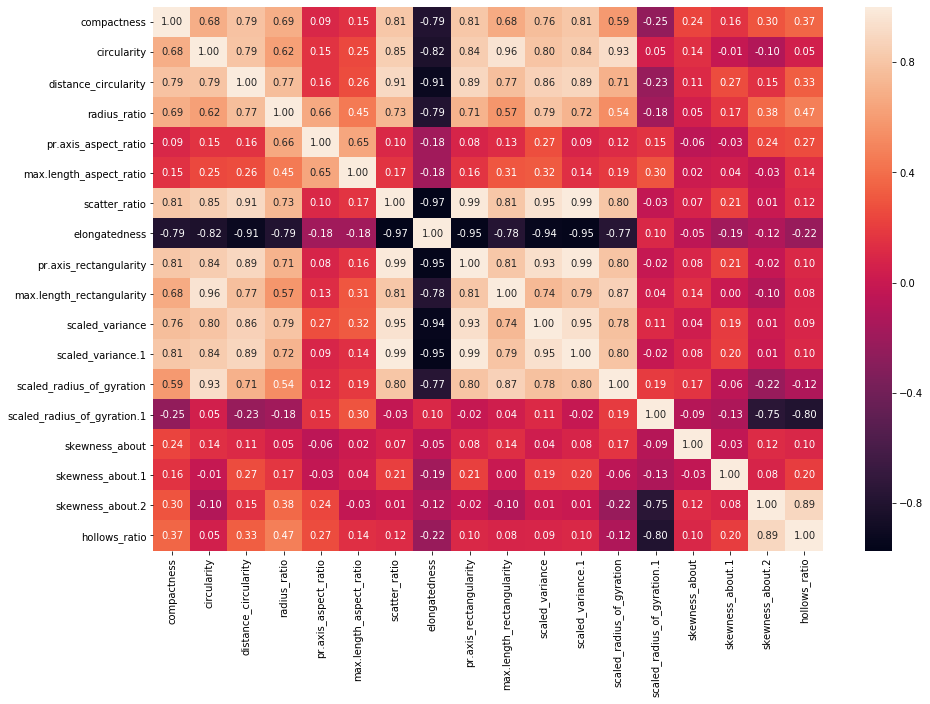

In [32]:
plt.rcParams['figure.figsize']=[15,10]
corr=car_df.corr()
sns.heatmap(corr, annot=True, fmt='.2f')
# By looking at the above pairplot and the below heatmap we can say that thre are many variables that are highly
#correlated to each other.some of them are:
 # 'circularity' is correlated to scatter_ratio,elongatedness,pr.axis_rectangularit,ax.length_rectangularit,scaled_variance             
   #scaled_variance.1,scaled_radius_of_gyration.
 #'distance_circularity' is correlated to scatter_ratio,elongatedness,pr.axis_rectangularit,ax.length_rectangularit,
    #scaled_variance.1,scaled_radius_of_gyration.

In [33]:
car_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

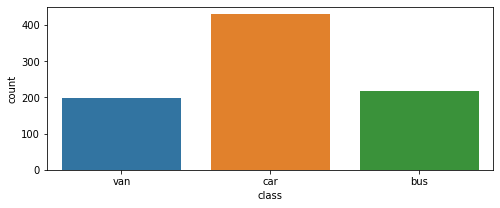

In [34]:
plt.rcParams['figure.figsize']=[8,3]
sns.countplot(car_df['class'])


Text(0.5, 1.0, 'Box Plot')

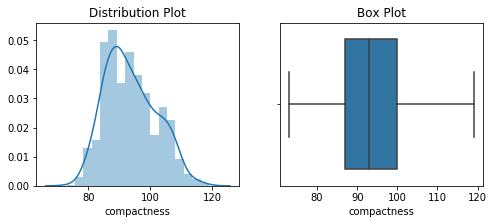

In [35]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
sns.distplot(car_df['compactness'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(car_df['compactness'],ax=ax2)
ax2.set_title("Box Plot")
# By looking at the below graph we can infer that the distribution of compactness in almost normal and
# there are no outliers.

Text(0.5, 1.0, 'Box Plot')

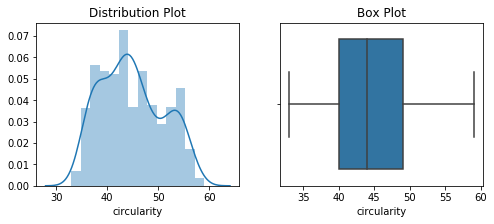

In [36]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
sns.distplot(car_df['circularity'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(car_df['circularity'],ax=ax2)
ax2.set_title("Box Plot")
# There are no outliers and looks to be distributed normally.

Text(0.5, 1.0, 'Box Plot')

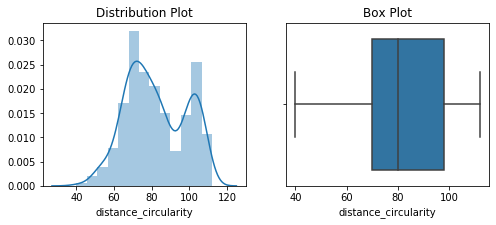

In [37]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
sns.distplot(car_df['distance_circularity'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(car_df['distance_circularity'],ax=ax2)
ax2.set_title("Box Plot")
# There are no Outliers and the data is skewed to the left with two peaks in the data.


ValueError: cannot convert float NaN to integer

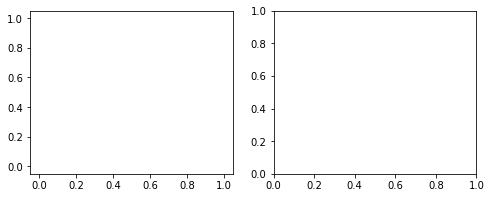

In [18]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
sns.distplot(car_df['radius_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(car_df['radius_ratio'],ax=ax2)
ax2.set_title("Box Plot")
# There are outliers and the data is right skewed.

Text(0.5, 1.0, 'Box Plot')

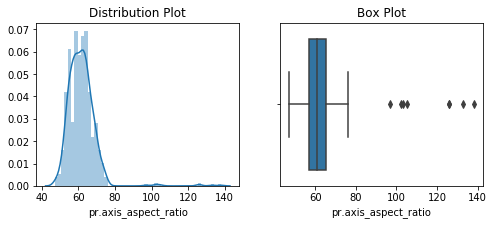

In [147]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
sns.distplot(car_df['pr.axis_aspect_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(car_df['pr.axis_aspect_ratio'],ax=ax2)
ax2.set_title("Box Plot")
# THere are outliers present and the data is right skewed bcoz there is long tail in the right.

Text(0.5, 1.0, 'Box Plot')

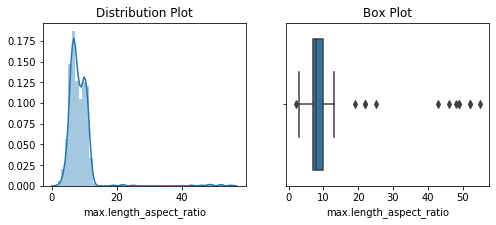

In [149]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
sns.distplot(car_df['max.length_aspect_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(car_df['max.length_aspect_ratio'],ax=ax2)
ax2.set_title("Box Plot")
# THere are outliers present and the data is highly skewed bcoz there is long tail in the right.

Text(0.5, 1.0, 'Box Plot')

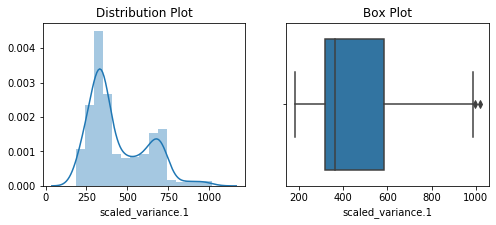

In [150]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
sns.distplot(car_df['scaled_variance.1'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(car_df['scaled_variance.1'],ax=ax2)
ax2.set_title("Box Plot")
# THere are outliers present and the data is skewed.

Text(0.5, 1.0, 'Box Plot')

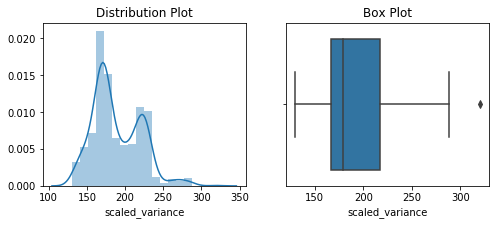

In [151]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
sns.distplot(car_df['scaled_variance'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(car_df['scaled_variance'],ax=ax2)
ax2.set_title("Box Plot")
# THere are outliers present and the data is highly skewed bcoz there is long tail in the right.

Text(0.5, 1.0, 'Box Plot')

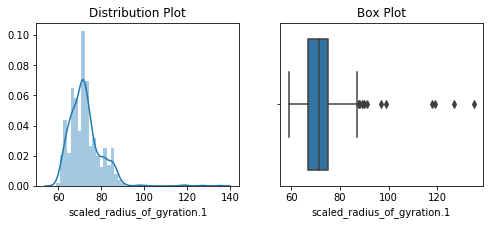

In [152]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
sns.distplot(car_df['scaled_radius_of_gyration.1'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(car_df['scaled_radius_of_gyration.1'],ax=ax2)
ax2.set_title("Box Plot")
# THere are outliers present and the data is highly skewed bcoz there is long tail in the right.

Text(0.5, 1.0, 'Box Plot')

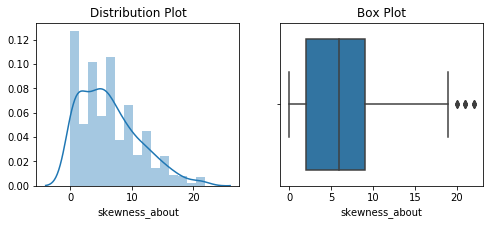

In [153]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
sns.distplot(car_df['skewness_about'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(car_df['skewness_about'],ax=ax2)
ax2.set_title("Box Plot")
# THere are outliers present and the data is skewed.

Text(0.5, 1.0, 'Box Plot')

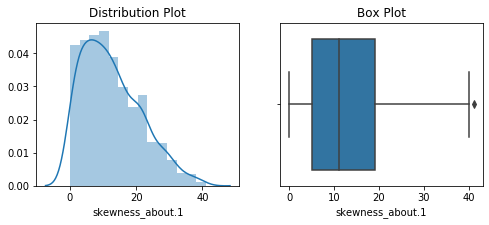

In [154]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
sns.distplot(car_df['skewness_about.1'],ax=ax1)
ax1.set_title("Distribution Plot")
sns.boxplot(car_df['skewness_about.1'],ax=ax2)
ax2.set_title("Box Plot")
# THere are outliers present and the data is right skewed bcoz there is long tail in the right.

In [38]:
#We calculate IQR of each column and use this value to find outlier in the next step.
Q1 =car_df.quantile(0.25)
Q3 = car_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   51.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 50.00
scaled_variance.1              268.50
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
dtype: float64


In [39]:
print(car_df < (Q1 - 1.5 * IQR)) |(car_df > (Q3 + 1.5 * IQR))
#False means Its not an outlier and True means it is an outlier.

     circularity  class  compactness  distance_circularity  elongatedness  \
0          False  False        False                 False          False   
1          False  False        False                 False          False   
2          False  False        False                 False          False   
3          False  False        False                 False          False   
4          False  False        False                 False          False   
5          False  False        False                 False          False   
6          False  False        False                 False          False   
7          False  False        False                 False          False   
8          False  False        False                 False          False   
9          False  False        False                 False          False   
10         False  False        False                 False          False   
11         False  False        False                 False          False   

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [40]:
# Formula for finding outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
# Here we are dropping outliers. 
car_df= car_df[~((car_df< (Q1 - 1.5 * IQR))
                               |(car_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("After fixing the outlier the shape of the dataframe is = ",car_df.shape)
car_df.shape

After fixing the outlier the shape of the dataframe is =  (813, 19)


(813, 19)

In [158]:
# we have foung outliers in these columnsradius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scaled_variance, 
#scaled_variance.1, scaled_radius_of_gyration.1, skewness_about, skewness_about.1 & dropped those outliers.

In [159]:
# lets split the data into train and test set

X = car_df.drop('class',axis=1) # Independent variable
y= car_df['class'] # Dependent variable

In [160]:
from scipy.stats import zscore
Xscaled=X.apply(zscore)
Xscaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.172252     0.524273              0.054413      0.320514   
1    -0.324348    -0.621958              0.118805     -0.852833   
2     1.289602     0.851768              1.535438      1.303589   
3    -0.076048    -0.621958             -0.009980     -0.282015   
5     1.662052    -0.130716              1.535438      0.130242   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.923745                 0.917511      -0.210249   
1             -0.743688                 0.429013      -0.607056   
2              0.856772                 0.917511       1.163315   
3              0.323285                 0.429013      -0.759675   
5             -1.988490                -1.036481       2.628450   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.143541               -0.226542                   0.763046   
1       0.532106               -0.618411                  -0.342266   
2      -1.151676                0.949066                   0.693964   
3       0.661628               -0.618411                  -0.342266   
5      -1.928806                2.908414                   1.453866   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.393996          -0.345187                   0.297468   
1        -0.592152          -0.626997                  -0.505992   
2         1.158224           1.127127                   1.409952   
3        -0.922412          -0.747772                  -1.463965   
5         3.040704           2.979021                   2.769655   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.323897       -0.038246          0.379490   
1                    -0.000795        0.609548          0.155190   
2                     0.160756        1.689205         -0.405562   
3                    -1.454753       -0.038246         -0.293412   
5                     2.099367       -0.254177         -0.405562   

   skewness_about.2  hollows_ratio  
0         -0.324770       0.176759  
1          0.002617       0.449185  
2         -0.161076       0.040546  
3          1.639554       1.538891  
5         -1.306932      -1.730226

In [177]:
y.replace({'car':0,'bus':1,'van':2},inplace=True)

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [162]:
covMatrix=np.cov(Xscaled,rowvar=False)
print("covarience matrix is = ")
print(covMatrix)

covarience matrix is = 
[[ 1.00123153e+00  6.80164027e-01  7.87792814e-01  7.46906930e-01
   2.00881439e-01  4.98273207e-01  8.11840645e-01 -7.89531434e-01
   8.12866245e-01  6.74996601e-01  7.92438680e-01  8.13494150e-01
   5.78399755e-01 -2.53990635e-01  2.00887113e-01  1.61304844e-01
   2.95777412e-01  3.64608943e-01]
 [ 6.80164027e-01  1.00123153e+00  7.87747162e-01  6.41725205e-01
   2.06409699e-01  5.64854067e-01  8.44804611e-01 -8.16768295e-01
   8.41196310e-01  9.62404205e-01  8.03750964e-01  8.33508154e-01
   9.26281607e-01  6.67790806e-02  1.40563881e-01 -1.43598307e-02
  -1.16976151e-01  3.92302597e-02]
 [ 7.87792814e-01  7.87747162e-01  1.00123153e+00  8.09326627e-01
   2.45756551e-01  6.69657073e-01  9.06692225e-01 -9.09806087e-01
   8.95884623e-01  7.69635504e-01  8.85221631e-01  8.89286924e-01
   7.03348558e-01 -2.38231284e-01  9.89345733e-02  2.63832735e-01
   1.29070982e-01  3.22051625e-01]
 [ 7.46906930e-01  6.41725205e-01  8.09326627e-01  1.00123153e+00
   6.67029240

In [165]:
#now with the help of above covariance matrix we will find eigen value and eigen vectors.
from sklearn.decomposition import PCA
pca=PCA(n_components=18)
pca.fit(Xscaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [166]:
#display explained variance ratio
print(pca.explained_variance_ratio_)

[5.43385012e-01 1.87386253e-01 6.70690992e-02 6.30665320e-02
 4.97324675e-02 3.65268566e-02 1.79255090e-02 1.25904175e-02
 6.25572293e-03 4.22850947e-03 3.43129149e-03 2.45487103e-03
 1.66416799e-03 1.48558789e-03 1.07943424e-03 9.83188815e-04
 5.61620004e-04 1.73459006e-04]


In [168]:
print(pca.components_)

[[ 2.72251046e-01  2.85370045e-01  3.01486231e-01  2.72594510e-01
   9.85797647e-02  1.94755787e-01  3.10518442e-01 -3.08438338e-01
   3.07548493e-01  2.76301073e-01  3.02748114e-01  3.07040626e-01
   2.61520489e-01 -4.36323635e-02  3.67057041e-02  5.88504115e-02
   3.48373860e-02  8.28136172e-02]
 [-8.97284818e-02  1.33173937e-01 -4.40259591e-02 -2.04232234e-01
  -2.59136858e-01 -9.45756320e-02  7.23350799e-02 -1.16876769e-02
   8.40915278e-02  1.25836631e-01  7.01998575e-02  7.79336637e-02
   2.09927277e-01  5.03914450e-01 -1.45682524e-02 -9.33980545e-02
  -5.01664210e-01 -5.06546563e-01]
 [-2.26045073e-02 -2.10809943e-01  7.08780817e-02  4.02139629e-02
  -1.14805227e-01 -1.39313484e-01  1.12924698e-01 -9.00330455e-02
   1.11063547e-01 -2.19877688e-01  1.44818765e-01  1.15323952e-01
  -2.13627435e-01  6.73920886e-02 -5.21623444e-01  6.87170643e-01
  -6.22069465e-02 -4.08035393e-02]
 [-1.30419032e-01  2.06785531e-02 -1.07425217e-01  2.52957341e-01
   6.05228001e-01 -3.22531411e-01  1.

In [169]:
#display explained variance
print(pca.explained_variance_)

[9.79297570e+00 3.37710644e+00 1.20873054e+00 1.13659560e+00
 8.96286859e-01 6.58293128e-01 3.23056525e-01 2.26906613e-01
 1.12741686e-01 7.62069059e-02 6.18393099e-02 4.42420969e-02
 2.99919142e-02 2.67735138e-02 1.94537446e-02 1.77191935e-02
 1.01216098e-02 3.12610726e-03]


Text(0, 0.5, 'variation explained')

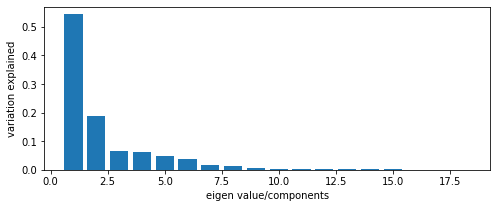

In [171]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_)
plt.xlabel("eigen value/components")
plt.ylabel("variation explained")

Text(0, 0.5, 'cummalative of variation explained')

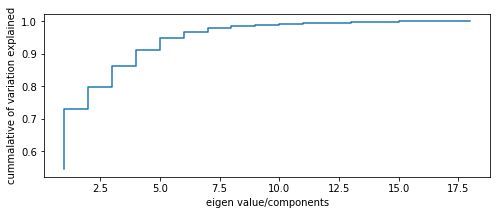

In [173]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("eigen value")
plt.ylabel("cummalative of variation explained")
#We can infer that 8 dimension are able to explain 95% variance of data. so we will use first 8 principal components

In [174]:
pca8=PCA(n_components=8)
pca8.fit(Xscaled)
print(pca8.components_)
print(pca8.explained_variance_ratio_)
##transform the impute raw data which is in 18 dimension into 8 new dimension with pca
Xpca8=pca8.transform(Xscaled)

[[ 0.27225105  0.28537005  0.30148623  0.27259451  0.09857976  0.19475579
   0.31051844 -0.30843834  0.30754849  0.27630107  0.30274811  0.30704063
   0.26152049 -0.04363236  0.0367057   0.05885041  0.03483739  0.08281362]
 [-0.08972848  0.13317394 -0.04402596 -0.20423223 -0.25913686 -0.09457563
   0.07233508 -0.01168768  0.08409153  0.12583663  0.07019986  0.07793366
   0.20992728  0.50391445 -0.01456825 -0.09339805 -0.50166421 -0.50654656]
 [-0.02260451 -0.21080994  0.07087808  0.04021396 -0.11480523 -0.13931348
   0.1129247  -0.09003305  0.11106355 -0.21987769  0.14481876  0.11532395
  -0.21362744  0.06739209 -0.52162344  0.68717064 -0.06220695 -0.04080354]
 [-0.13041903  0.02067855 -0.10742522  0.25295734  0.605228   -0.32253141
   0.01005404 -0.07991176 -0.01604649 -0.06665079  0.06980451  0.01736316
   0.07224572  0.13586056 -0.49012168 -0.38023248  0.03553916 -0.10300842]
 [ 0.15232414 -0.13902259 -0.08073354  0.11901255  0.08321282 -0.62137607
   0.08124056 -0.07473792  0.07750

In [175]:
Xpca8

array([[ 0.59112544, -0.6555232 , -0.56447723, ..., -1.83581406,
        -0.155983  ,  0.68314382],
       [-1.52487769, -0.32711662, -0.25152779, ..., -0.09164949,
         0.20986241, -0.12774469],
       [ 3.96998211,  0.23951421, -1.22987549, ..., -0.65063818,
         0.82644457, -0.16318453],
       ...,
       [ 5.18891923, -0.1713193 , -0.58573773, ...,  0.22589076,
         0.88852524,  0.42970397],
       [-3.32174837, -1.09413204,  1.93095283, ..., -0.030116  ,
        -0.26554236, -0.45112269],
       [-5.01285261,  0.43269721,  1.3157135 , ...,  0.34586333,
        -0.40912383,  0.22126242]])

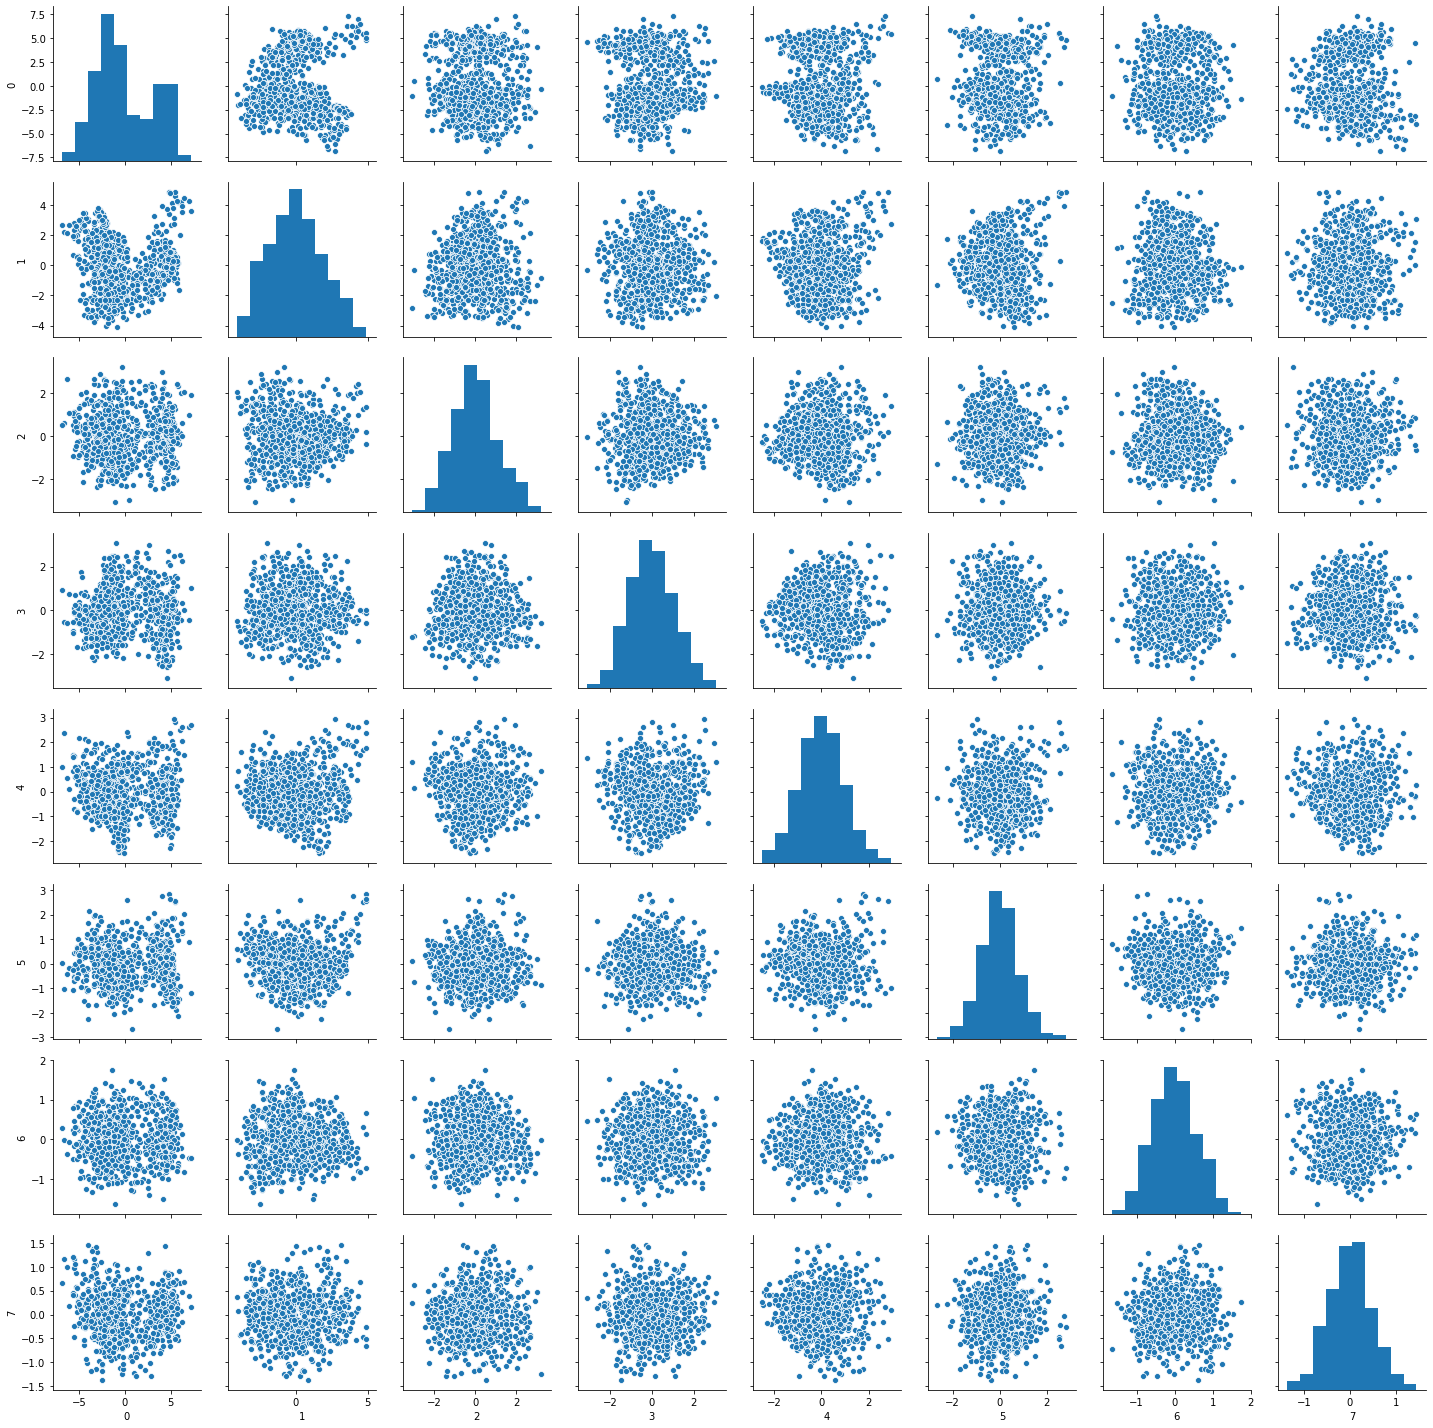

In [176]:
sns.pairplot(pd.DataFrame(Xpca8))

In [178]:
#Before applying pca with 8 dimension which are explaining more than 95% variantion of data we will make model on raw 
#data after that we will make model with pca and then we will compare both models.
#now split the data into 80:20 ratio
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Xscaled,y,test_size=0.20,random_state=1)
X_train_pca,X_test_pca,y_train_pca,y_test_pca = train_test_split(Xpca8,y,test_size=0.20,random_state=1)

In [184]:
#fit the model on raw data
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix


In [186]:
svc=SVC()
svc.fit(X_train,y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [189]:
#predict the y value
y_predict = svc.predict(X_test)

In [190]:
#now fit the model on pca data with new dimension
svc.fit(X_train_pca,y_train_pca)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [192]:
#predict the y value
y_pca_predict = svc.predict(X_test_pca)

In [196]:
#display accuracy score of both models
print("Accuracy score with raw data(18 dimension)",accuracy_score(y_test,y_predict))
print("Accuracy score with pca data(8 dimension)",accuracy_score(y_test_pca,y_pca_predict))

Accuracy score with raw data(18 dimension) 0.9693251533742331
Accuracy score with pca data(8 dimension) 0.9447852760736196


In [198]:
#display confusion matrix of both models
print("Confusion matrix with raw data '18 attributes'\n",confusion_matrix(y_test,y_predict))
print("Confusion matrix with pca data'8 attributes'\n",confusion_matrix(y_test_pca,y_pca_predict))

Confusion matrix with raw data '18 attributes'
 [[83  0  1]
 [ 0 53  0]
 [ 3  1 22]]
Confusion matrix with pca data'8 attributes'
 [[82  1  1]
 [ 2 51  0]
 [ 4  1 21]]


In [200]:
from sklearn import metrics
#Lets see other performance measuring parameters
# For raw data
print(metrics.classification_report(y_test, y_predict)) 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        84
           1       0.98      1.00      0.99        53
           2       0.96      0.85      0.90        26

    accuracy                           0.97       163
   macro avg       0.97      0.94      0.96       163
weighted avg       0.97      0.97      0.97       163



In [201]:
# for pca data
print(metrics.classification_report(y_test, y_pca_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        84
           1       0.96      0.96      0.96        53
           2       0.95      0.81      0.88        26

    accuracy                           0.94       163
   macro avg       0.95      0.92      0.93       163
weighted avg       0.95      0.94      0.94       163



In [ ]:
#Conclusion:

#From above results we can infer that accuracy with pca is approx 94% with only 8 attributes and accuracy of whole data
#is approx 96% with all 18 attributes.
# Other performance parameters are also show the same result i.e pca gives almost similar result with only 8 attributes.